In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf

In [3]:
cobr = yf.Ticker('cobr.l')
cobr

yfinance.Ticker object <COBR.L>

In [4]:
cobr_data = cobr.history(period='max')
cobr_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,602.000000,602.000000,602.000000,602.000000,6.020000e+02,602.0,602.0
mean,1.648434,1.719922,1.570920,1.652359,2.991472e+06,0.0,0.0
std,0.661333,0.726067,0.600849,0.658958,6.349563e+06,0.0,0.0
min,0.725000,0.650000,0.650000,0.725000,0.000000e+00,0.0,0.0
25%,1.250000,1.250000,1.250000,1.250000,0.000000e+00,0.0,0.0
50%,1.250000,1.250000,1.250000,1.250000,7.100260e+05,0.0,0.0
75%,2.200000,2.324000,2.054500,2.200000,3.668438e+06,0.0,0.0
max,3.500000,3.900000,3.300000,3.500000,6.326053e+07,0.0,0.0


In [5]:
cobr_data.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-15,1.675,1.748,1.675,1.75,116500,0,0
2018-11-16,1.750,1.750,1.750,1.75,0,0,0
2018-11-19,1.650,1.650,1.650,1.65,0,0,0


## plot with go, 不能更换style, 够不允许调整figsize

In [6]:
import plotly.graph_objects as go

In [8]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


plt.figure(figsize=(20,8))
plt.style.use('classic')
fig = go.Figure([go.Scatter(x=cobr_2020.index, y=cobr_2020['Close'])])
fig.show()


<Figure size 1440x576 with 0 Axes>

## plot with matplotlib using data from 2020-1-1

In [ ]:
cobr_2020 = cobr_data[cobr_data.index >= '2020-1-1']

In [9]:
cobr_2020.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,1.25,1.25,1.25,1.25,0,0,0
2020-01-03,1.25,1.25,1.25,1.25,0,0,0
2020-01-06,1.25,1.25,1.25,1.25,0,0,0
2020-01-07,1.25,1.25,1.25,1.25,0,0,0
2020-01-08,1.25,1.25,1.25,1.25,0,0,0


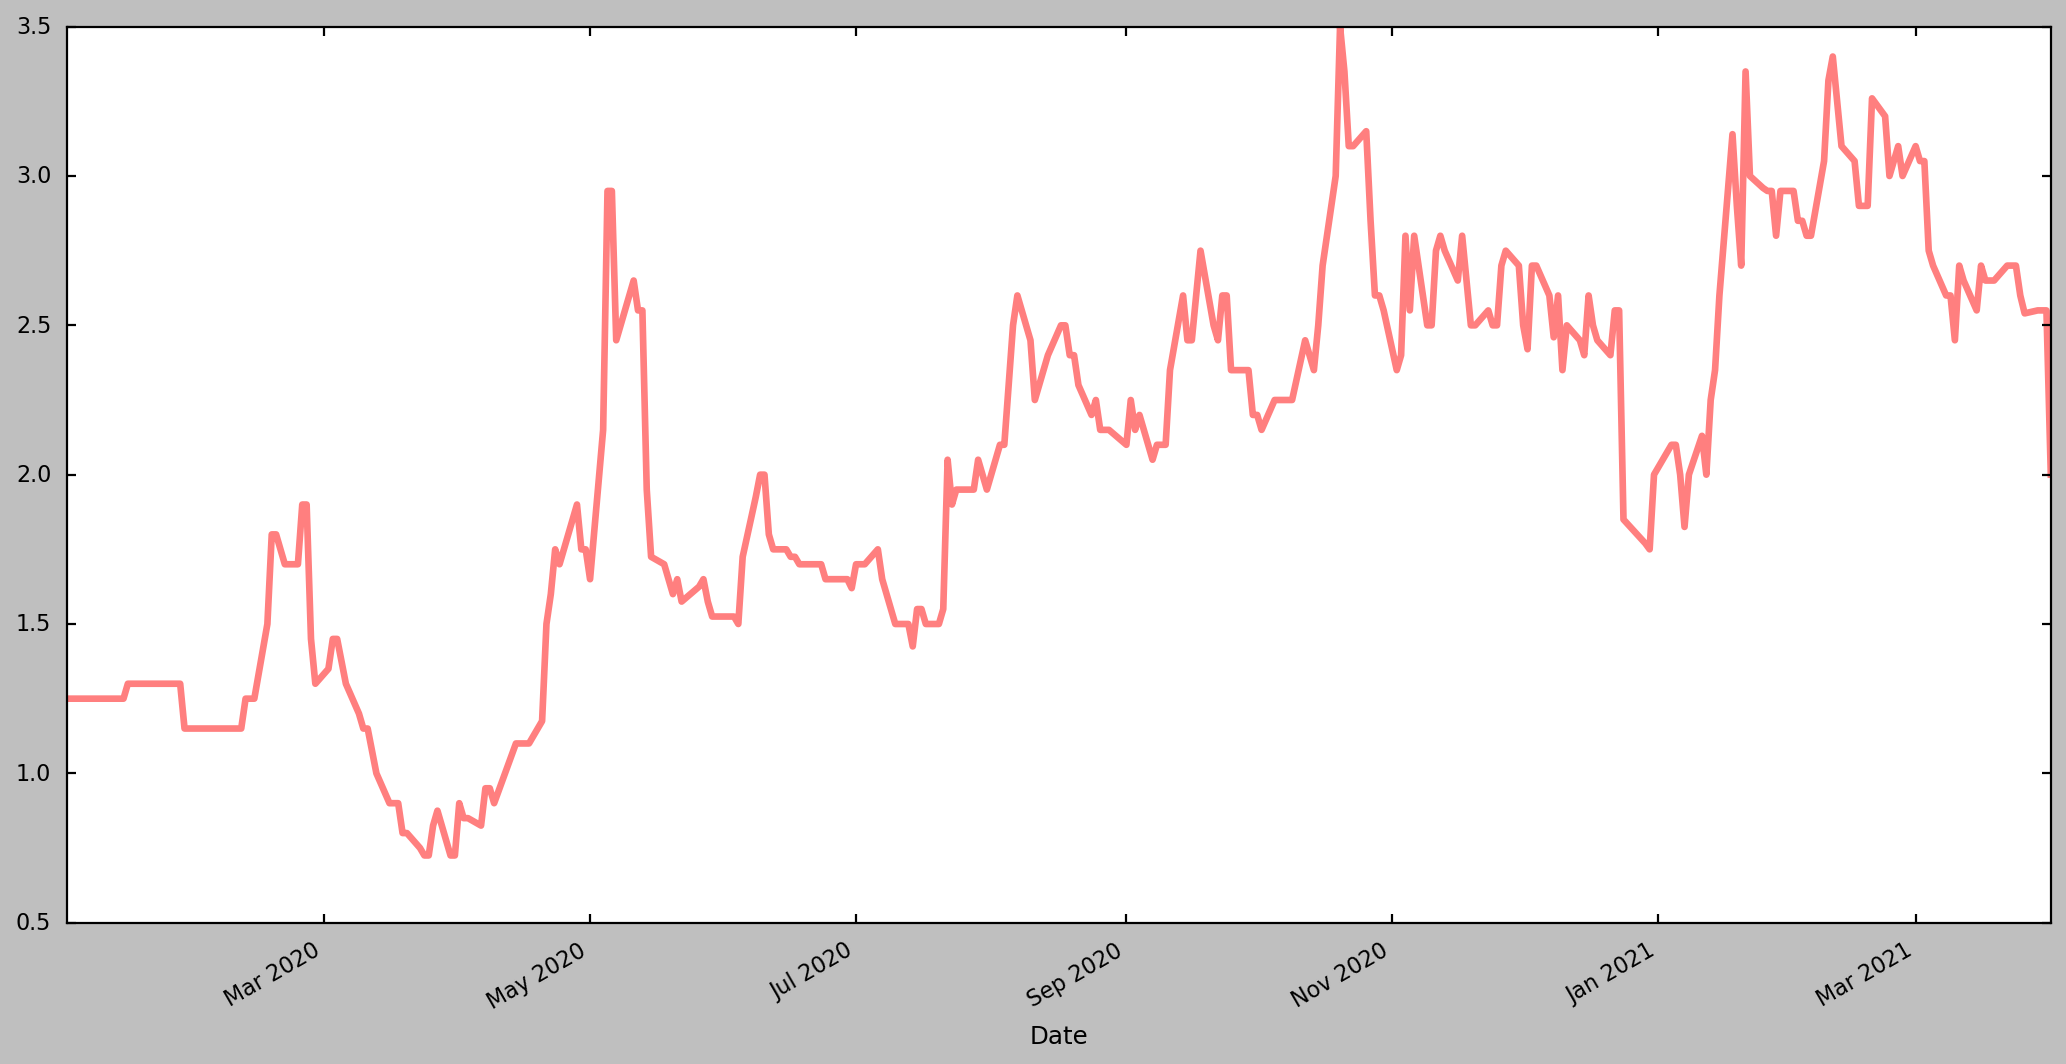

In [10]:
# %config InlineBackend.figure_format = 'retina'
# %matplotlib inline

import matplotlib.style as style
plt.figure(figsize=(16,8))
# plt.get_cmap('tab10')
plt.style.use('seaborn-notebook')
cobr_2020.Close.plot( color='C2', alpha=0.5, linewidth=3);


#### add 'raised price' into the graph

In [11]:
# create raised price column, fill in cobr rasied price, 2.25p, from 2020.2 onwards

cobr_2020['r_price_feb'] = 2.25

# chage the Jan raised price to 0, because it started on Feb
cobr_2020.iloc[:22,7] = 0

In [12]:
# second raise happend in 2020-9, at the price 2.30p

cobr_2020['r_price_sep'] = 2.30

# chage the Jan raised price to 0, because it started on Feb
cobr_2020[cobr_2020.index <= '2020-8-31'].r_price_sep = 0

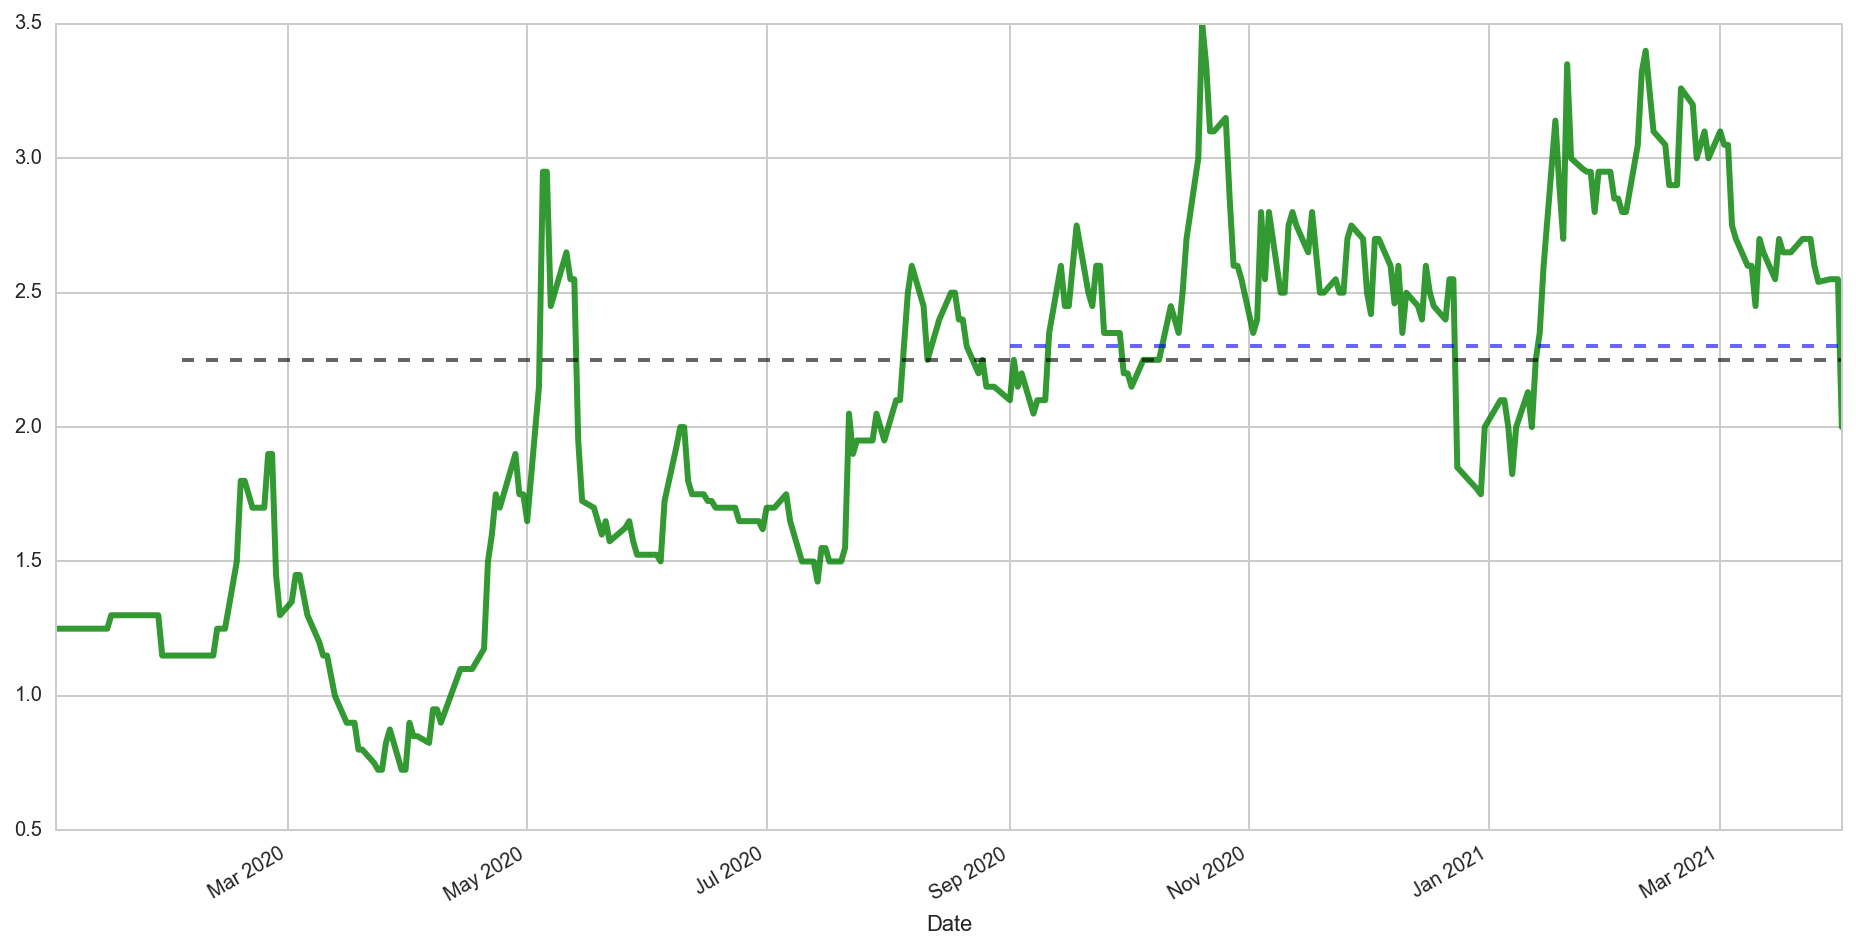

In [13]:
# plot current stock price and r_price
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.figure(figsize=(16,8))
plt.style.use('seaborn-whitegrid')
cobr_2020.Close.plot( color='C8', alpha=0.8, linewidth=3)
cobr_2020['2020-2-03':].r_price_feb.plot( color='C6', alpha=0.6, linewidth=2, ls='dashed')
cobr_2020[cobr_2020.index >= '2020-8-31'].r_price_sep.plot( color='C7', alpha=0.6, linewidth=2, ls='dashed')
plt.show()

#### 增加 feb和sep raised price 的具体价格

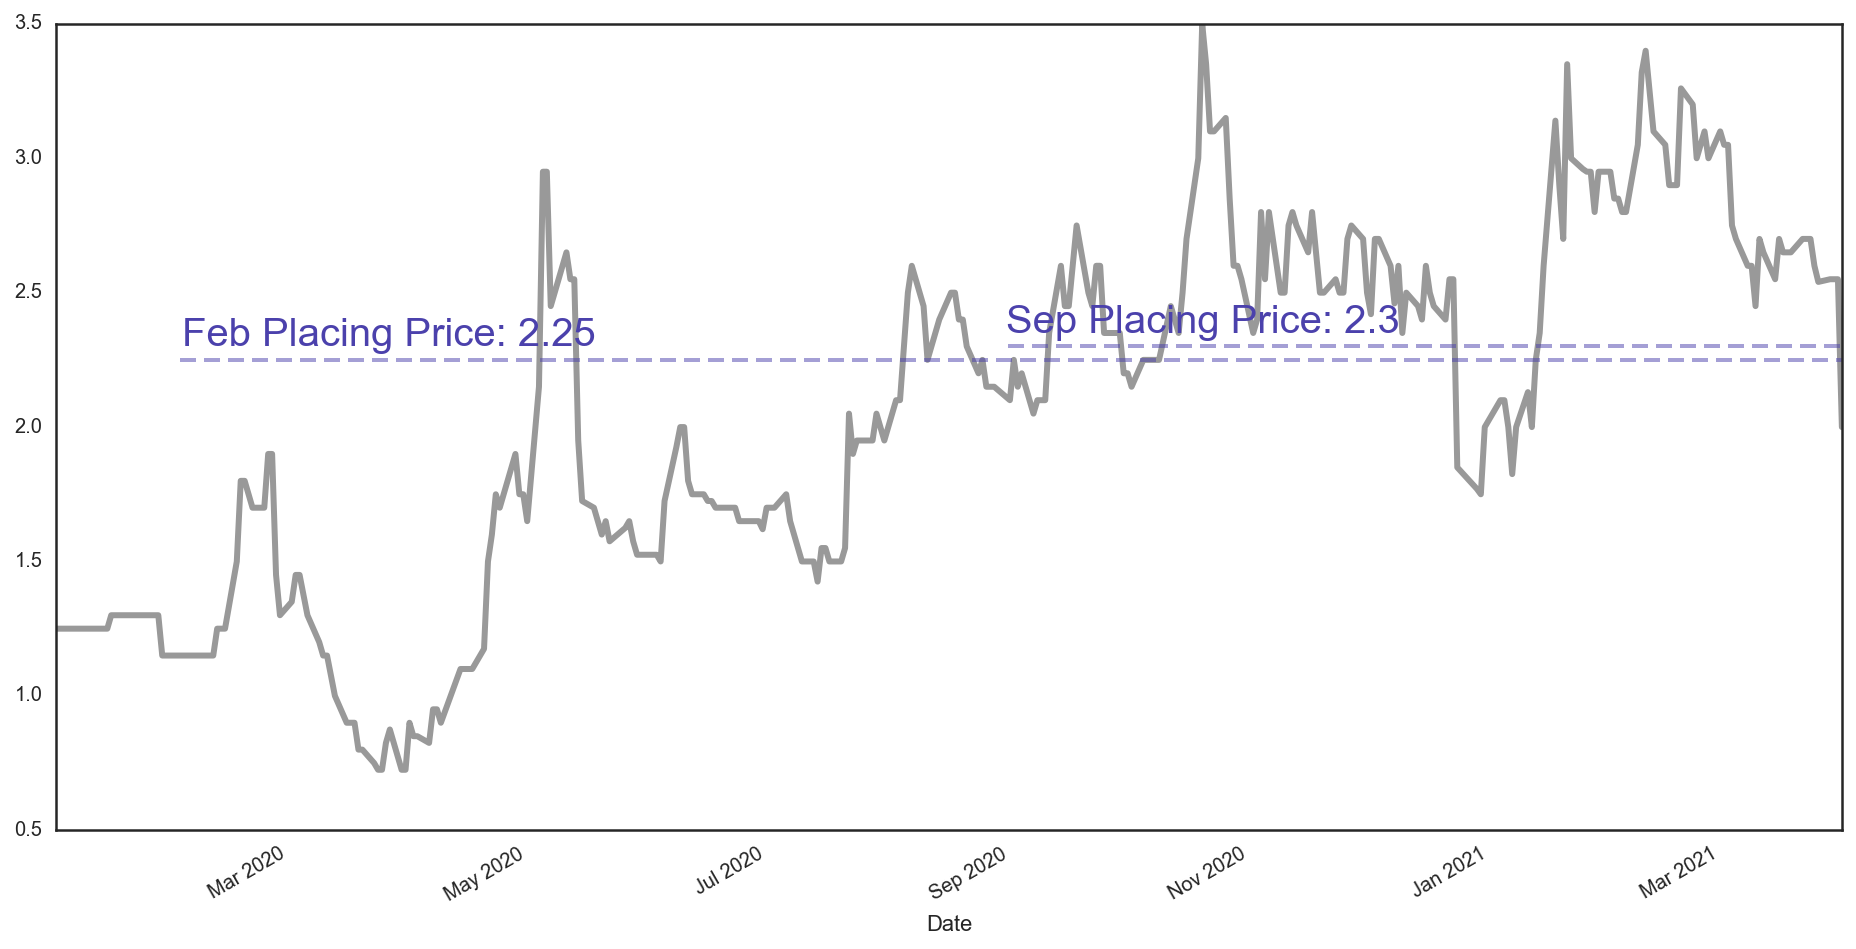

In [14]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.figure(figsize=(16,8)) # 改变图像大小,字体大小不会自适应的更改
plt.style.use('seaborn-white')
plt.text('2020-2-03', 2.25+0.05, 'Feb Placing Price: 2.25', fontsize=20, color='#4b41ac')
plt.text('2020-8-31', 2.3+0.05, 'Sep Placing Price: 2.3', fontsize=20, color='#4b41ac')
cobr_2020.Close.plot( color='k', alpha=0.4, linewidth=3)
cobr_2020['2020-2-03':].r_price_feb.plot( color='#4b41ac', alpha=0.5, linewidth=2, ls='dashed',dash_capstyle='projecting')
cobr_2020[cobr_2020.index >= '2020-8-31'].r_price_sep.plot( color='#4b41ac', alpha=0.5, linewidth=2, ls='dashed',dash_capstyle='projecting')

# plt.grid()

plt.show()

#### 加入ylim, xylable, legend, title控制

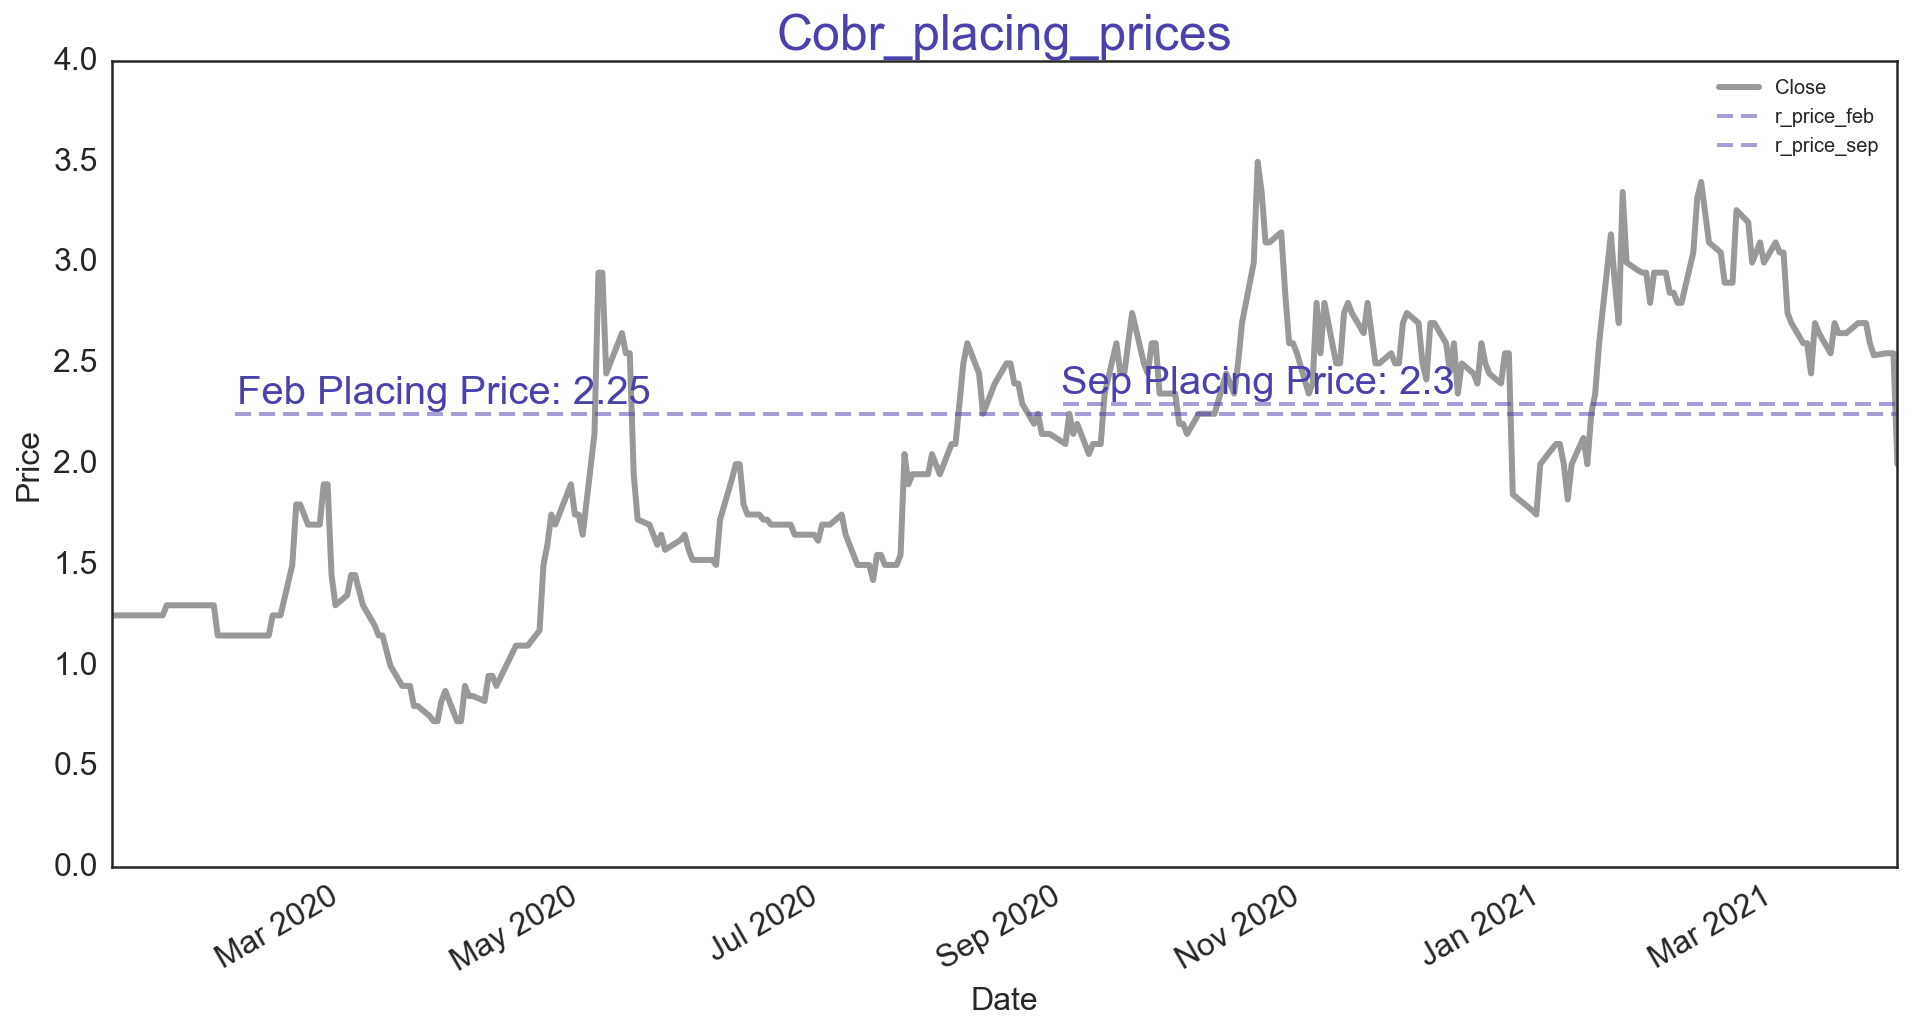

In [15]:

plt.figure(figsize=(16,8)) 
plt.style.use('seaborn-white')
plt.text('2020-2-03', 2.25+0.05, 'Feb Placing Price: 2.25', fontsize=20, color='#4b41ac')
plt.text('2020-8-31', 2.3+0.05, 'Sep Placing Price: 2.3', fontsize=20, color='#4b41ac')
cobr_2020.Close.plot( color='k', alpha=0.4, linewidth=3)
cobr_2020['2020-2-03':].r_price_feb.plot( color='#4b41ac', alpha=0.5, linewidth=2, ls='dashed',dash_capstyle='projecting')
cobr_2020[cobr_2020.index >= '2020-8-31'].r_price_sep.plot( color='#4b41ac', alpha=0.5, linewidth=2, ls='dashed',dash_capstyle='projecting')

plt.title('Cobr_placing_prices', fontsize=25, color='#4b41ac')
plt.legend(loc='upper-right')

plt.yticks(fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.ylim(0,4)

plt.xticks(fontsize=16)
plt.xlabel('Date', fontsize=16)


plt.show()

#### 加入最高点的数据和plot

In [17]:
cobr_2020.Close.max()

3.5

In [32]:
idx = cobr_2020[cobr_2020['Close']==cobr_2020.Close.max()].index

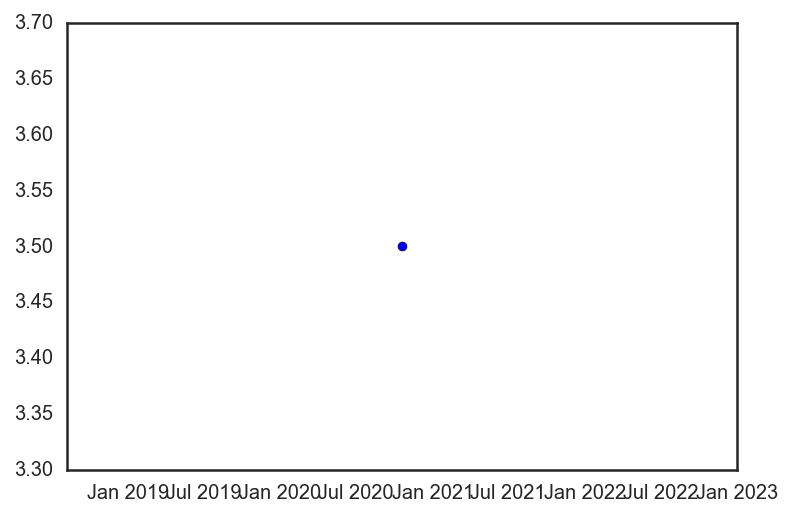

In [33]:
# How to plot just a single point
plt.scatter(idx, cobr_2020.Close.max());

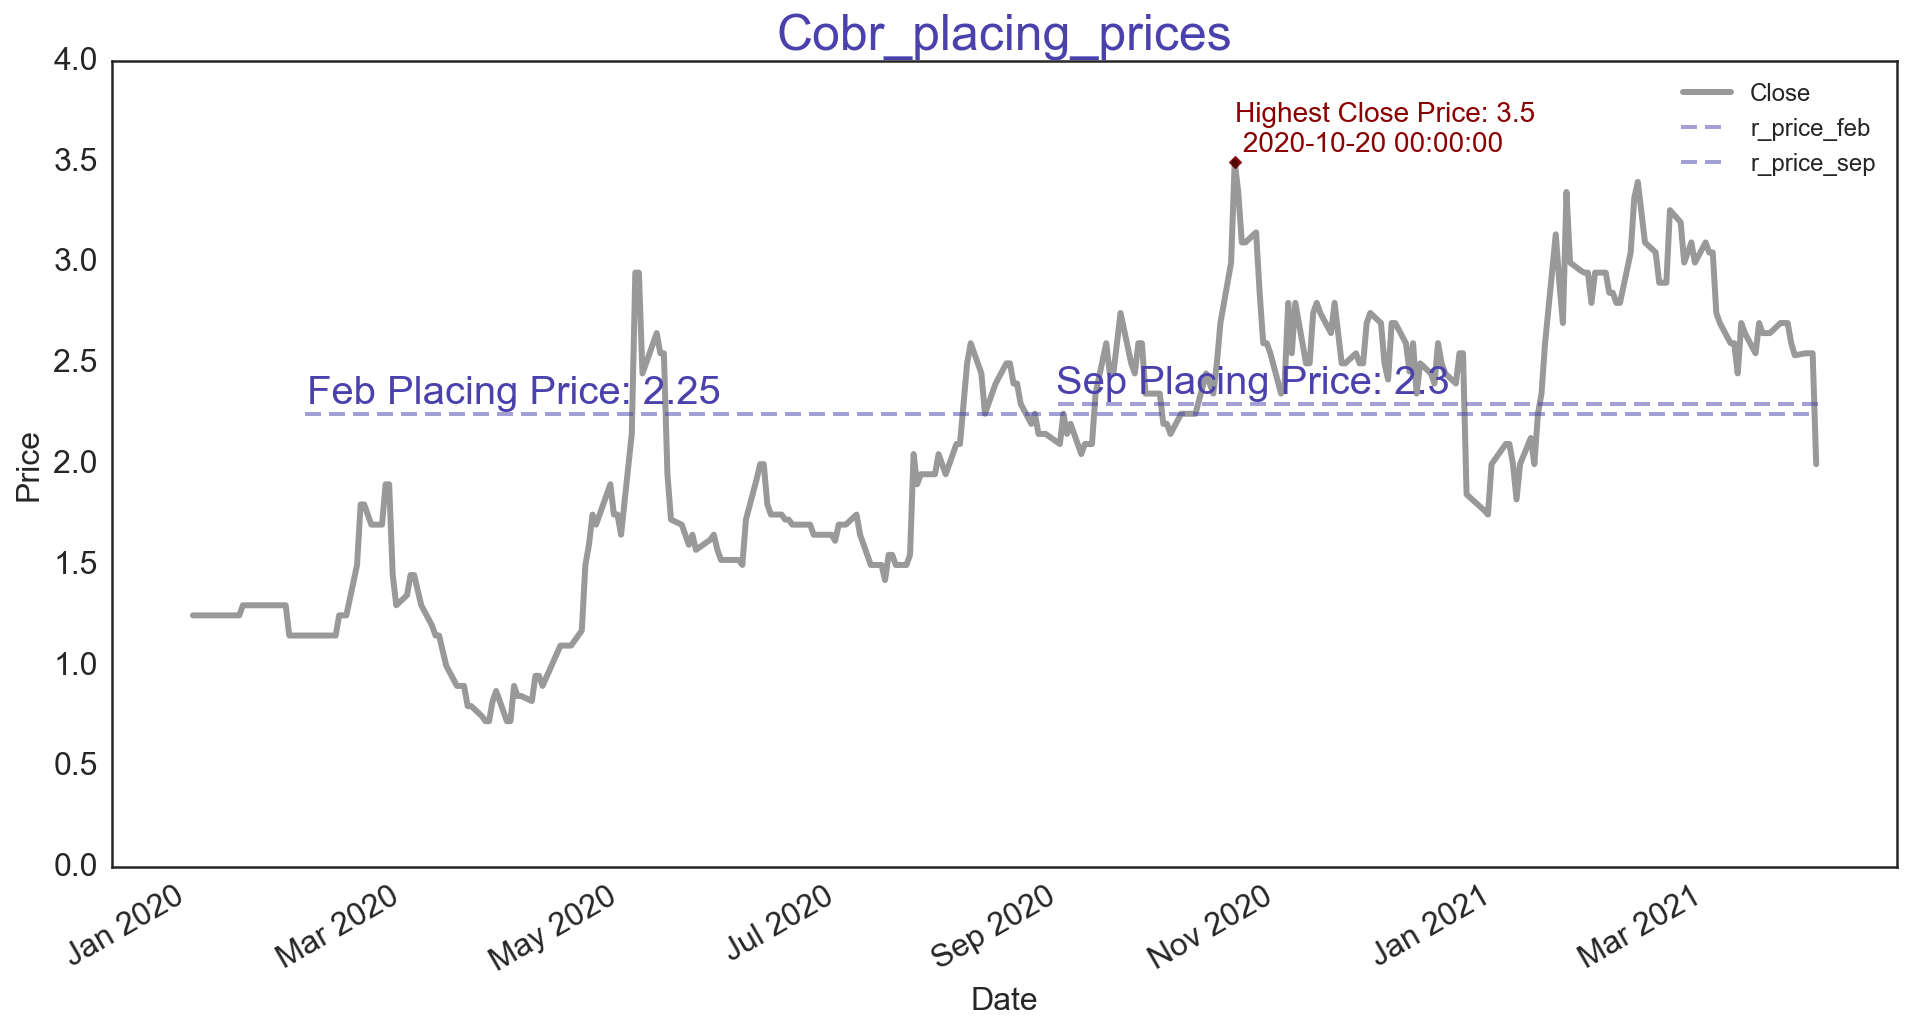

In [59]:

plt.figure(figsize=(16,8)) 
plt.style.use('seaborn-white')
plt.text('2020-2-03', 2.25+0.05, 'Feb Placing Price: 2.25', fontsize=20, color='#4b41ac')
plt.text('2020-8-31', 2.3+0.05, 'Sep Placing Price: 2.3', fontsize=20, color='#4b41ac')
cobr_2020.Close.plot( color='k', alpha=0.4, linewidth=3)
cobr_2020['2020-2-03':].r_price_feb.plot( color='#4b41ac', alpha=0.5, linewidth=2, ls='dashed',dash_capstyle='projecting')
cobr_2020[cobr_2020.index >= '2020-8-31'].r_price_sep.plot( color='#4b41ac', alpha=0.5, linewidth=2, ls='dashed',dash_capstyle='projecting')

plt.title('Cobr_placing_prices', fontsize=25, color='#4b41ac')
plt.legend(loc='upper-right', fontsize=12)

plt.yticks(fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.ylim(0,4)

plt.xticks(fontsize=16)
plt.xlabel('Date', fontsize=16)

plt.scatter(idx, cobr_2020.Close.max(), color='darkred', marker='D');
plt.text(idx, cobr_2020.Close.max()+0.05, 'Highest Close Price: {} \n {}'.format(cobr_2020.Close.max(),idx[0]), fontsize=14, color='darkred',)

plt.show()

In [ ]:
print(style.available)

In [ ]:
stl = style.available
for i in stl:
    
    plt.style.use(i)
    %config InlineBackend.figure_format = 'retina'
    %matplotlib inline
    
    print(i)
    cobr_2020['2020-2-03':].r_price_feb.plot( color='C6', alpha=0.5, linewidth=2, ls='dashed')

    plt.show()